## 1. Load Data

In [1]:

import numpy as np

# Load npz
data = np.load("../data/cancer_4features_data.npz")

X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

print(f"Training X shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"Testing X shape: {X_test.shape}, y shape: {y_test.shape}")

Training X shape: (341, 4), y shape: (341,)
Testing X shape: (114, 4), y shape: (114,)


## 2. Traiable Quantum Feature Map

In [2]:
#!/usr/bin/env python3
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))


In [4]:
from src.feature_map import TrainableQuantumFeatureMap as TQFM1
from qiskit_algorithms.optimizers import COBYLA, ADAM


depth = 1
optimizer = COBYLA(maxiter=10000)


# Train the feature map
tqfm1 = TQFM1(depth=depth, type_ansatz="RealAmplitudes")
tqfm1.fit(X_train, y_train, optimizer=optimizer)

Number of qubits: 4, Number of classes: 2


In [5]:
from src.feature_map2 import TrainableQuantumFeatureMap as TQFM3
from qiskit_algorithms.optimizers import COBYLA, ADAM


depth = 1
optimizer = COBYLA(maxiter=10000)


# Train the feature map
tqfm3 = TQFM3(depth=depth, type_ansatz="RealAmplitudes")
tqfm3.fit(X_train, y_train, optimizer=optimizer)

Number of qubits: 4, Number of classes: 2
Using AerSimulator for accelerated statevector computation


In [6]:
print(tqfm1.optimal_value)
print(tqfm3.optimal_value)

0.29158637922005026
0.29158637918931996


In [3]:
from src.feature_map import TrainableQuantumFeatureMap
from qiskit_algorithms.optimizers import COBYLA, SPSA, ADAM

# Train the feature map
depth = 1
optimizer = COBYLA(maxiter=10000)

tqfm1 = TrainableQuantumFeatureMap(depth=depth, type_ansatz="TwoLocal")
tqfm1.fit(X_train, y_train, optimizer=optimizer)

tqfm2 = TrainableQuantumFeatureMap(depth=depth, type_ansatz="RealAmplitudes")
tqfm2.fit(X_train, y_train, optimizer=optimizer)

tqfm3 = TrainableQuantumFeatureMap(depth=depth, type_ansatz="EfficientSU2")
tqfm3.fit(X_train, y_train, optimizer=optimizer)


Number of qubits: 4, Number of classes: 2
Number of qubits: 4, Number of classes: 2
Number of qubits: 4, Number of classes: 2


In [4]:
print(f"tqfm1.optimal_value: {tqfm1.optimal_value}")
print(f"tqfm2.optimal_value: {tqfm2.optimal_value}")
print(f"tqfm3.optimal_value: {tqfm3.optimal_value}")

tqfm1.optimal_value: 0.4614548049620988
tqfm2.optimal_value: 0.2805278192597467
tqfm3.optimal_value: 0.28114116114612


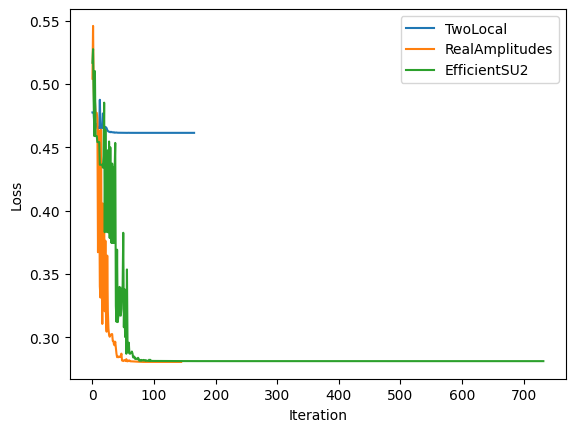

In [5]:
# draw 3 loss curves in one plot
import matplotlib.pyplot as plt
plt.plot(tqfm1.loss_history, label='TwoLocal')
plt.plot(tqfm2.loss_history, label='RealAmplitudes')
plt.plot(tqfm3.loss_history, label='EfficientSU2')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

In [6]:
from src.feature_map import TrainableQuantumFeatureMap
from qiskit_algorithms.optimizers import COBYLA, SPSA, ADAM

# Train the feature map
depth = 2
optimizer = COBYLA(maxiter=10000)

tqfm4 = TrainableQuantumFeatureMap(depth=depth, type_ansatz="TwoLocal")
tqfm4.fit(X_train, y_train, optimizer=optimizer)

tqfm5 = TrainableQuantumFeatureMap(depth=depth, type_ansatz="RealAmplitudes")
tqfm5.fit(X_train, y_train, optimizer=optimizer)

tqfm6 = TrainableQuantumFeatureMap(depth=depth, type_ansatz="EfficientSU2")
tqfm6.fit(X_train, y_train, optimizer=optimizer)


Number of qubits: 4, Number of classes: 2
Number of qubits: 4, Number of classes: 2
Number of qubits: 4, Number of classes: 2


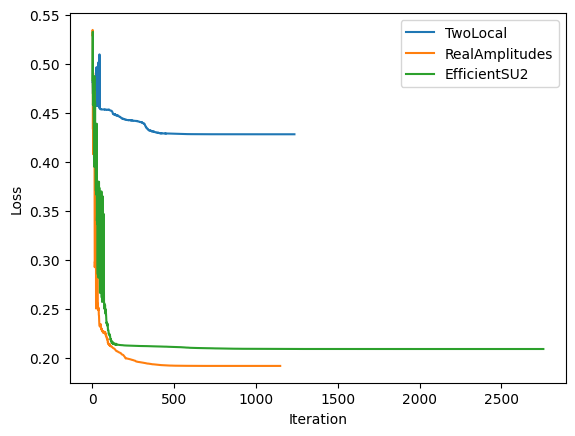

In [7]:
# draw 3 loss curves in one plot
import matplotlib.pyplot as plt
plt.plot(tqfm4.loss_history, label='TwoLocal')
plt.plot(tqfm5.loss_history, label='RealAmplitudes')
plt.plot(tqfm6.loss_history, label='EfficientSU2')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()